<a href="https://colab.research.google.com/github/Shubham-naik-ai/NYC-taxi-trip-time-prediction/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [187]:
# Importing usefull laibraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import Series
from datetime import datetime

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/AlmaBetter/SupervisedML-Regression/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
#Loading the Dataset
train_df = pd.read_csv(working_dir_path + 'NYCTaxiData.csv')

In [189]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [190]:
train_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [191]:
#Checking dimensions
train_df.shape

(1458644, 11)

In [192]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [193]:
train_df.duplicated().sum()


0

In [194]:
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [195]:
train_df.isna().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [196]:
train_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [197]:
train_df['vendor_id'].value_counts().reset_index()


,index,vendor_id
0,2,780302
1,1,678342


In [198]:
train_df['store_and_fwd_flag'].value_counts().reset_index()


,index,store_and_fwd_flag
0,N,1450599
1,Y,8045


In [199]:
train_df[train_df['passenger_count']==0].count()


id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [200]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [201]:
train_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


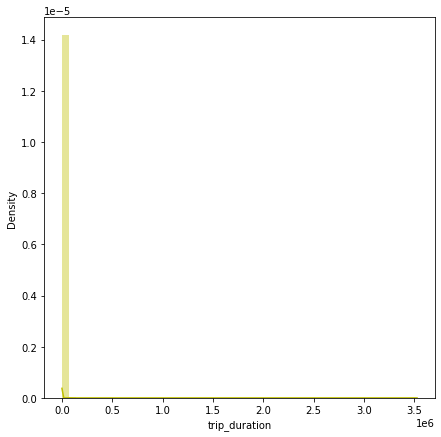

In [202]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(train_df['trip_duration'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


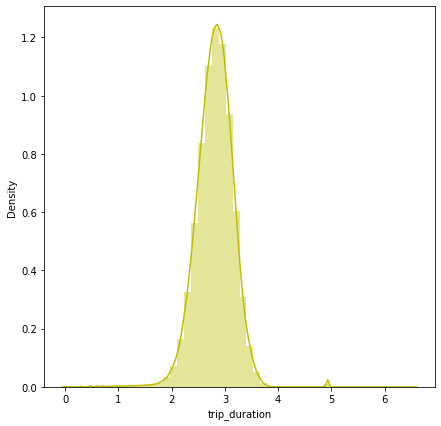

In [203]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(train_df['trip_duration']),color="y")

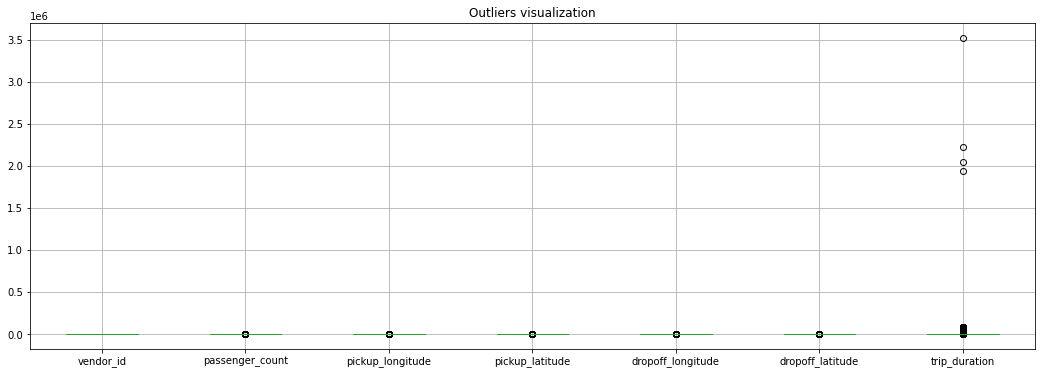

In [204]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
train_df.boxplot();

In [205]:
train_df=train_df[train_df.trip_duration!=train_df.trip_duration.max()]

In [206]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])

In [207]:
train_df['pickup_day']=train_df['pickup_datetime'].dt.day_name()
train_df['dropoff_day']=train_df['dropoff_datetime'].dt.day_name()

In [208]:
train_df['pickup_day'].value_counts()

Friday       223533
Saturday     220867
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [209]:
train_df['dropoff_day'].value_counts()

Friday       223030
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

In [210]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


In [211]:
numeric_features = train_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

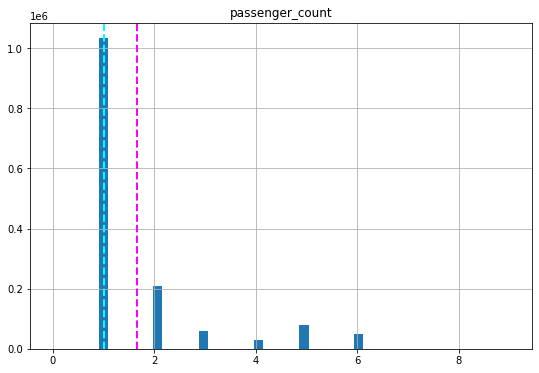

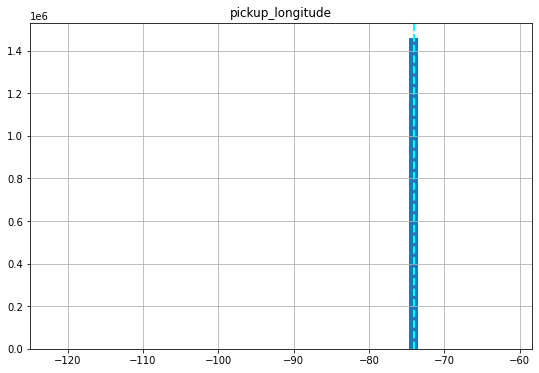

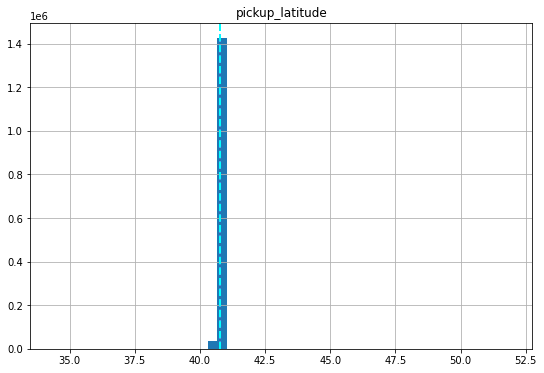

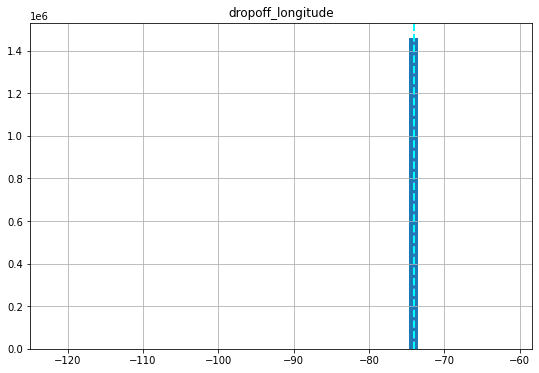

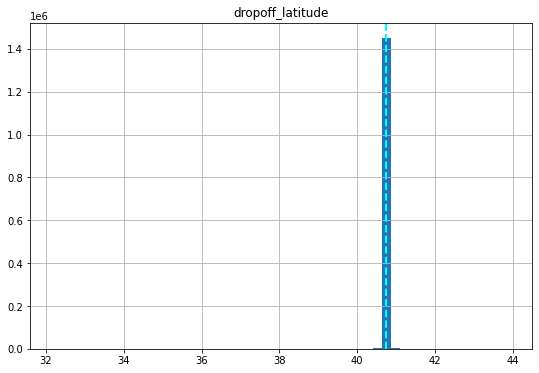

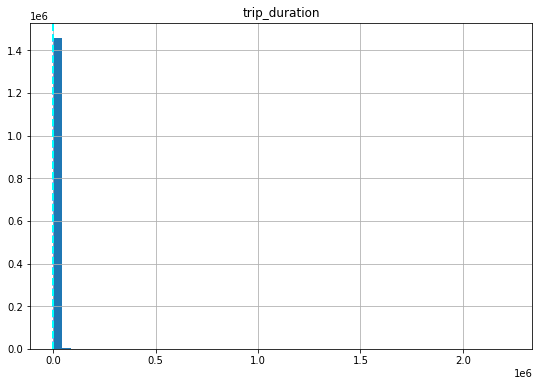

In [212]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = train_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

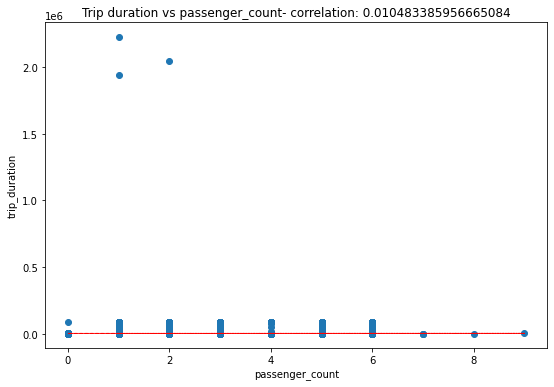

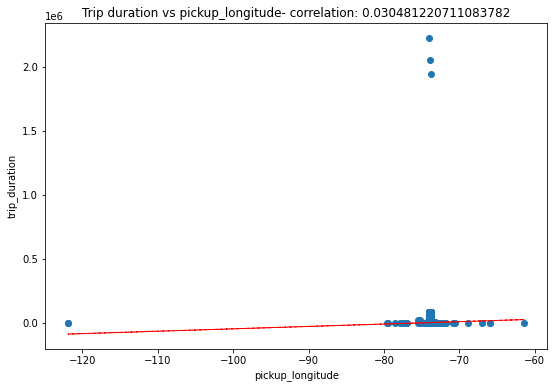

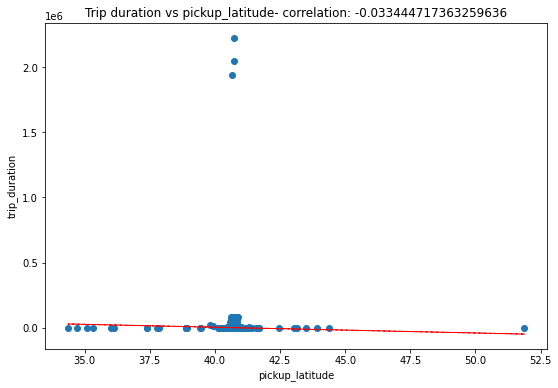

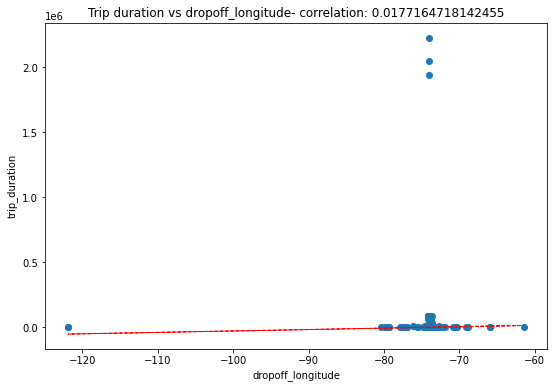

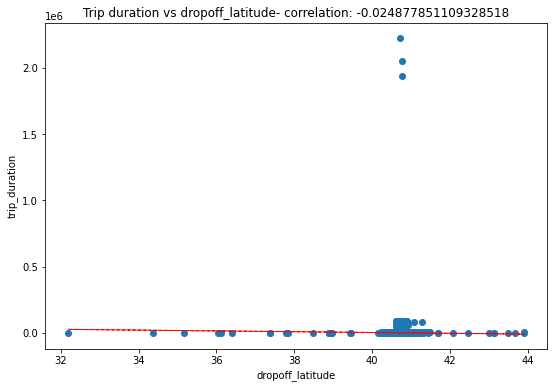

In [213]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = train_df[col]
    label = train_df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(train_df[col], train_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(train_df[col])

    plt.plot(train_df[col], y_hat, "r--", lw=1)

plt.show()

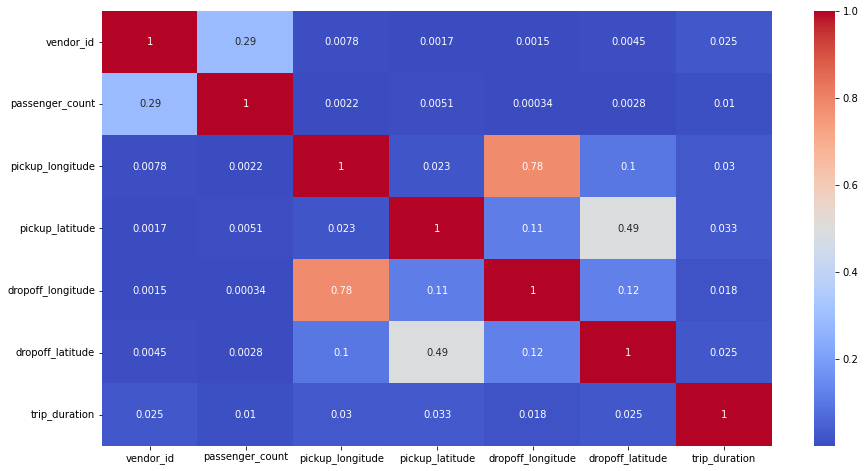

In [214]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = train_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [215]:
train_df = train_df[(train_df.pickup_longitude > -100)]
train_df = train_df[(train_df.pickup_latitude < 50)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


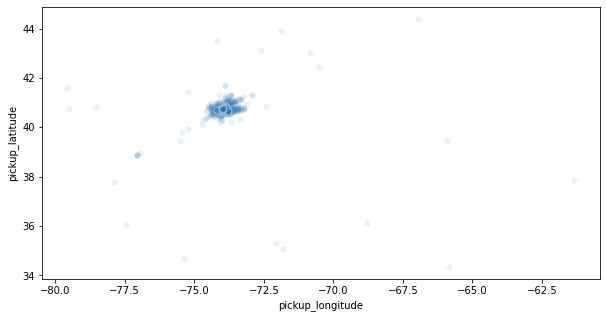

In [216]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.pickup_longitude,train_df.pickup_latitude,alpha = 0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


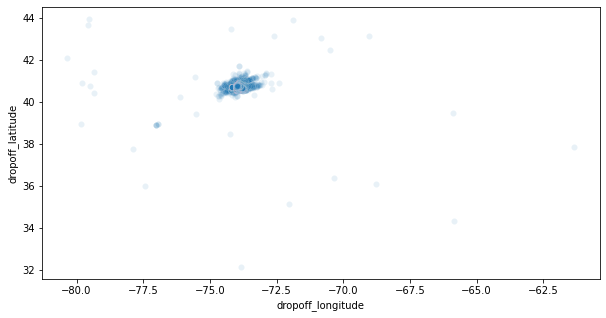

In [217]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.dropoff_longitude,train_df.dropoff_latitude,alpha = 0.1)

In [218]:
# Find limits of location
max_value = 99.999
min_value = 0.001

max_pickup_lat = np.percentile(train_df.pickup_latitude, max_value)
min_pickup_lat = np.percentile(train_df.pickup_latitude, min_value)
max_pickup_long = np.percentile(train_df.pickup_longitude, max_value)
min_pickup_long = np.percentile(train_df.pickup_longitude, min_value)

max_dropoff_lat = np.percentile(train_df.dropoff_latitude, max_value)
min_dropoff_lat = np.percentile(train_df.dropoff_latitude, min_value)
max_dropoff_long = np.percentile(train_df.dropoff_longitude, max_value)
min_dropoff_long = np.percentile(train_df.dropoff_longitude, min_value)

In [219]:
# Remove extreme values
train_df = train_df[(train_df.pickup_latitude <= max_pickup_lat) & (train_df.pickup_latitude >= min_pickup_lat)]
train_df = train_df[(train_df.pickup_longitude <= max_pickup_long) & (train_df.pickup_longitude >= min_pickup_long)]

train_df = train_df[(train_df.dropoff_latitude <= max_dropoff_lat) & (train_df.dropoff_latitude >= min_dropoff_lat)]
train_df = train_df[(train_df.dropoff_longitude <= max_dropoff_long) & (train_df.dropoff_longitude >= min_dropoff_long)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


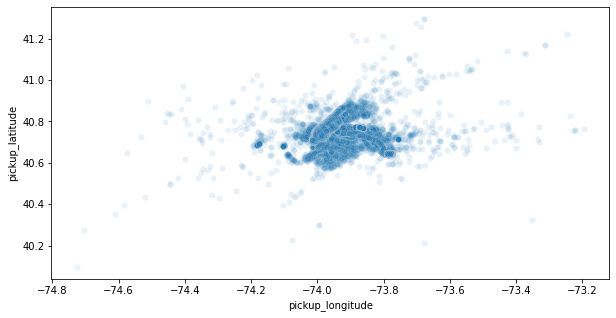

In [220]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.pickup_longitude,train_df.pickup_latitude,alpha = 0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


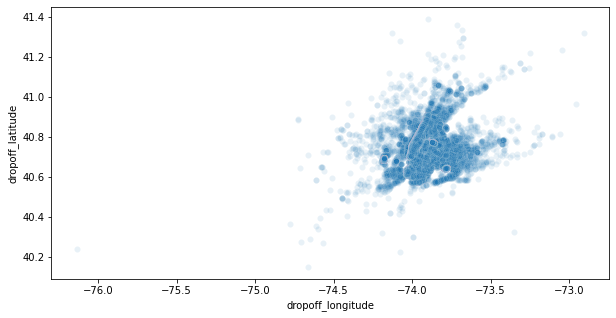

In [221]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.dropoff_longitude,train_df.dropoff_latitude,alpha = 0.1)

In [222]:
train_df.store_and_fwd_flag = train_df.store_and_fwd_flag.map(lambda x: 1 if x == 'Y' else 0)


In [223]:
train_df['pickup_day']=train_df['pickup_datetime'].dt.day_name()
train_df['dropoff_day']=train_df['dropoff_datetime'].dt.day_name()
train_df['pickup_day_no']=train_df['pickup_datetime'].dt.weekday
train_df['dropoff_day_no']=train_df['dropoff_datetime'].dt.weekday
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour
train_df['dropoff_hour']=train_df['dropoff_datetime'].dt.hour
train_df['pickup_month']=train_df['pickup_datetime'].dt.month
train_df['dropoff_month']=train_df['dropoff_datetime'].dt.month

In [224]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458592 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458592 non-null  object        
 1   vendor_id           1458592 non-null  int64         
 2   pickup_datetime     1458592 non-null  datetime64[ns]
 3   dropoff_datetime    1458592 non-null  datetime64[ns]
 4   passenger_count     1458592 non-null  int64         
 5   pickup_longitude    1458592 non-null  float64       
 6   pickup_latitude     1458592 non-null  float64       
 7   dropoff_longitude   1458592 non-null  float64       
 8   dropoff_latitude    1458592 non-null  float64       
 9   store_and_fwd_flag  1458592 non-null  int64         
 10  trip_duration       1458592 non-null  int64         
 11  pickup_day          1458592 non-null  object        
 12  dropoff_day         1458592 non-null  object        
 13  pickup_day_n

In [225]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,Monday,Monday,0,0,17,17,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,Sunday,Sunday,6,6,0,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,Tuesday,Tuesday,1,1,11,12,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,Wednesday,Wednesday,2,2,19,19,4,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,Saturday,Saturday,5,5,13,13,3,3


In [226]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [227]:
train_df['pickup_timeofday']=train_df['pickup_hour'].apply(time_of_day)
train_df['dropoff_timeofday']=train_df['dropoff_hour'].apply(time_of_day)

In [228]:
from geopy.distance import great_circle


In [229]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [230]:
train_df['distance'] = train_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

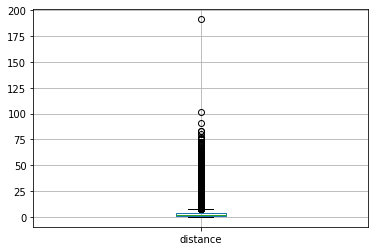

In [231]:
#Visualize distance outliers
train_df.boxplot(column='distance', return_type='axes');

In [232]:
percentile_q1 = np.percentile(train_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(train_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(train_df['distance'],75)
print(percentile_q3)

1.2318699815430105
2.0937252219245375
3.875204808370359


In [233]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [234]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.7331322586980122
Upper limit for outlier  : 7.840207048611382


In [235]:
train_df=train_df[train_df['distance']>0]
train_df=train_df[train_df['distance']<upper_limit_outlier]

In [236]:
train_df.shape

(1312063, 22)

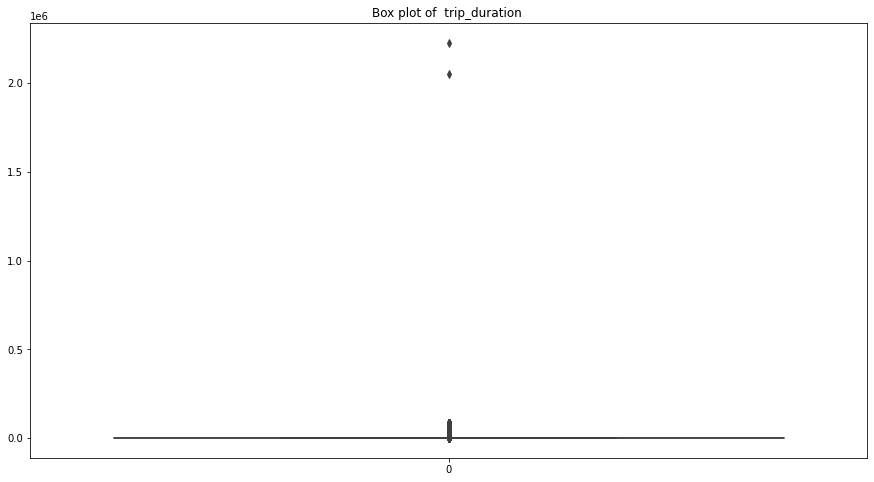

In [237]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=train_df['trip_duration'], orient="v")

In [238]:
percentile_q1_trip_duration = np.percentile(train_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(train_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(train_df['trip_duration'],75)
print(percentile_q3_trip_duration)

374.0
606.0
932.0


In [239]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

In [240]:
print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -463.0
Upper limit for outlier  : 1769.0


In [241]:
train_df=train_df[train_df['trip_duration']>0]
train_df=train_df[train_df['trip_duration']<upper_limit_outlier_trip_duration]

In [242]:
train_df.shape

(1271798, 22)

In [243]:
round(train_df.distance.describe([0.998,0.99999,0.999995]))

count       1271798.0
mean              2.0
std               2.0
min               0.0
50%               2.0
99.8%             8.0
99.999%           8.0
99.9995%          8.0
max               8.0
Name: distance, dtype: float64

In [244]:
train_df = train_df[(train_df.distance < 76)]
train_df.shape

(1271798, 22)

In [245]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,...,Saturday,5,5,22,22,1,1,Late night,Late night,1.098944


#Distribution of vendor_id

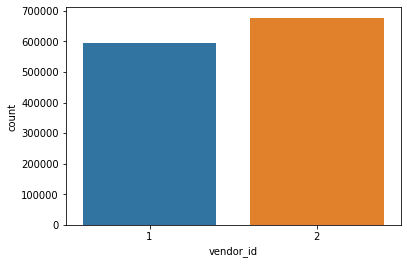

In [246]:
sns.countplot(x='vendor_id',data=train_df)

In [247]:
train_df['store_and_fwd_flag'].value_counts(normalize=True)

0    0.995222
1    0.004778
Name: store_and_fwd_flag, dtype: float64

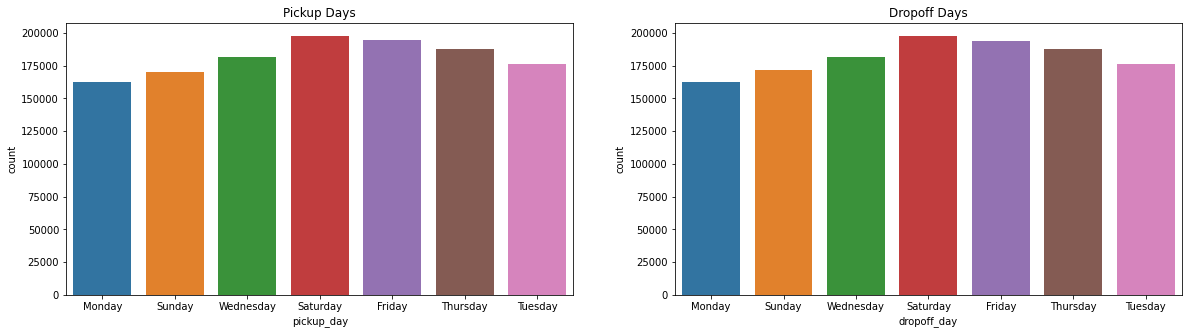

In [248]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=train_df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=train_df,ax=ax2)

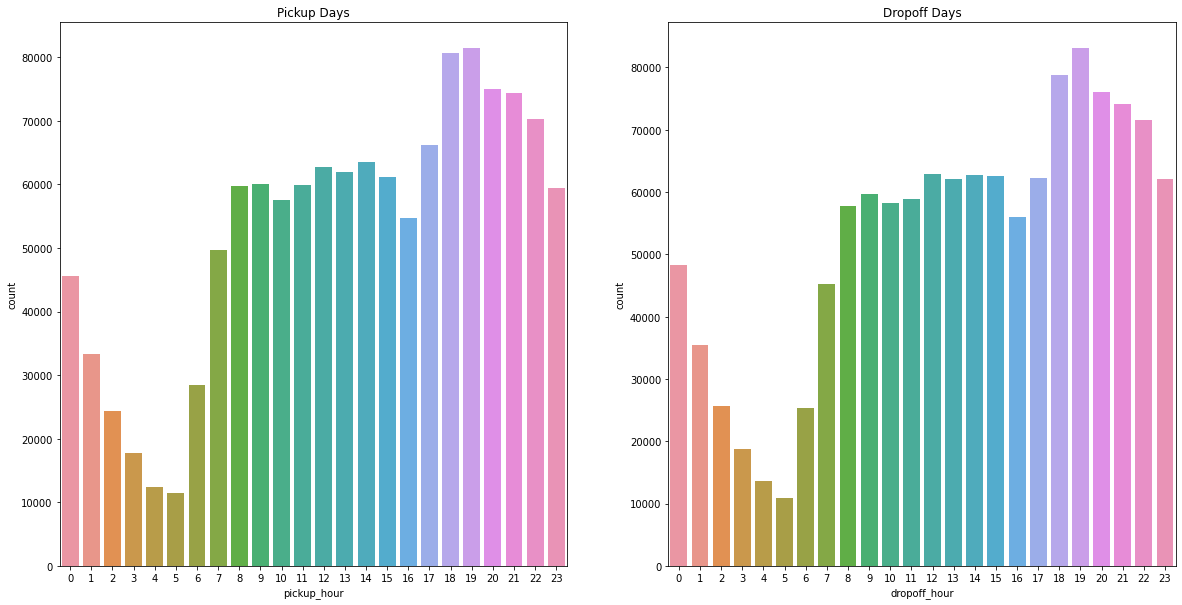

In [249]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,10))
ax3.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=train_df,ax=ax3)
ax4.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=train_df,ax=ax4)

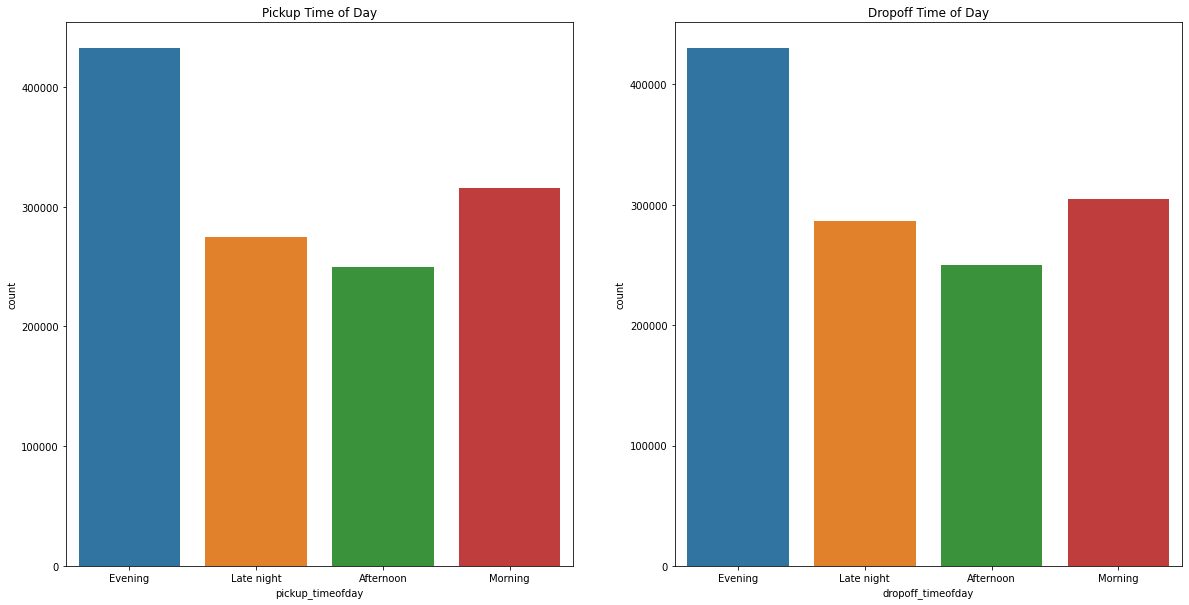

In [250]:
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,10))
ax5.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=train_df,ax=ax5)
ax6.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=train_df,ax=ax6)

In [251]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance'],
      dtype='object')

In [252]:
bins=np.array([0,1800,3600,5400,7200,90000])
train_df['duration_time']=pd.cut(train_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

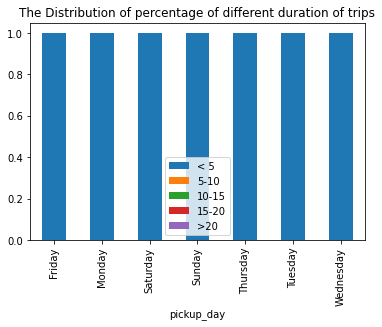

In [253]:
ax1=train_df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

In [254]:
train_df['trip_duration_hour']=train_df['trip_duration']/3600
train_df['log_distance']=np.log(train_df.distance)
train_df['log_trip_duration']=np.log(train_df.trip_duration_hour)

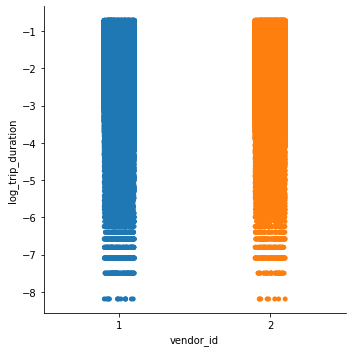

In [255]:
sns.catplot(x="vendor_id", y="log_trip_duration",kind="strip",data=train_df)

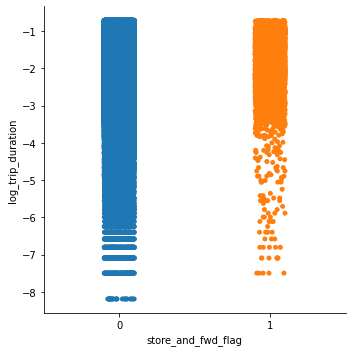

In [256]:
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=train_df)

#Trip Duration per hour

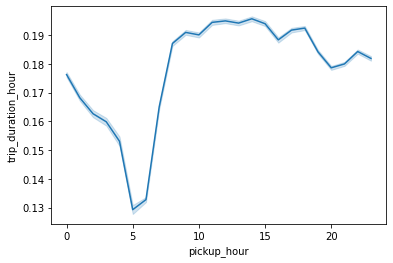

In [257]:
sns.lineplot(x='pickup_hour',y='trip_duration_hour',data=train_df)

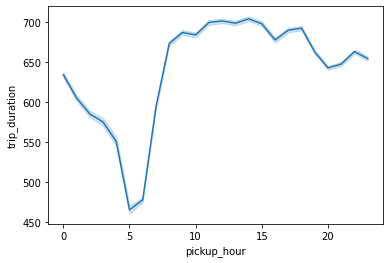

In [258]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=train_df)

#Trip Duration per time of day

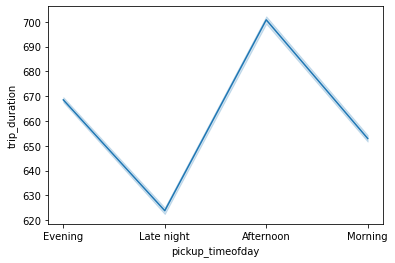

In [259]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=train_df)

#Trip Duration per Day of Week

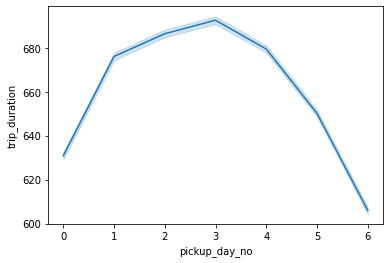

In [260]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=train_df)

#Trip Duration per month

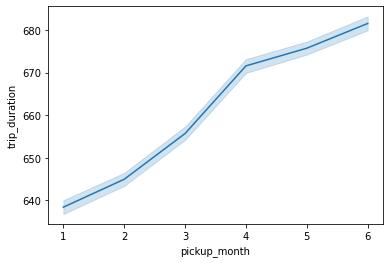

In [261]:
sns.lineplot(x='pickup_month',y='trip_duration',data=train_df)

#Distance per hour of day

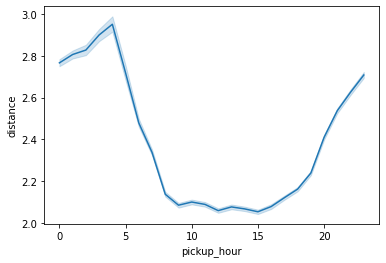

In [262]:
sns.lineplot(x='pickup_hour',y='distance',data=train_df)

#Distance per time of day

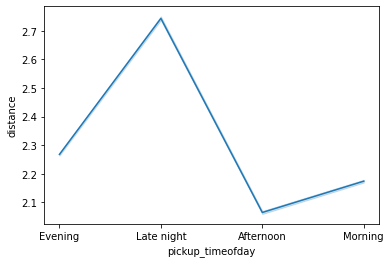

In [263]:
sns.lineplot(x='pickup_timeofday',y='distance',data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


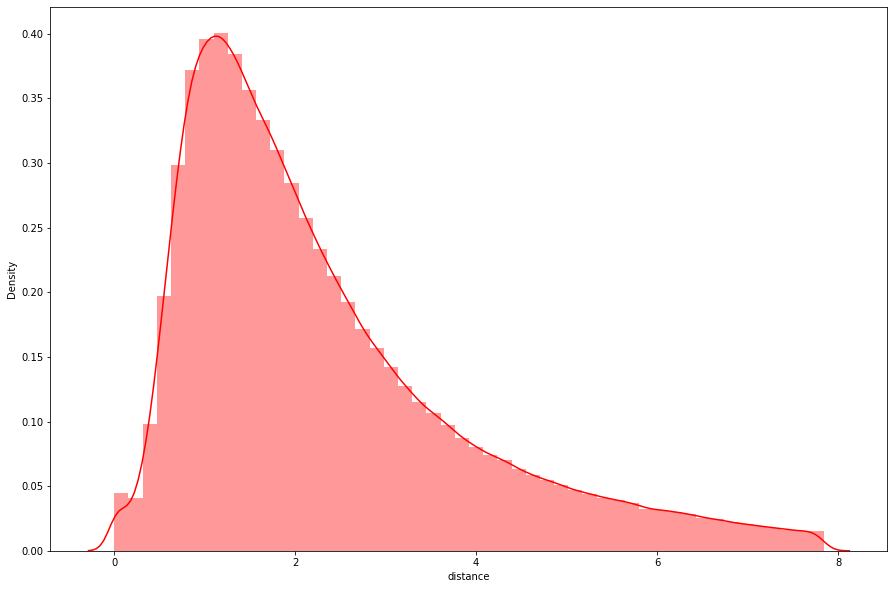

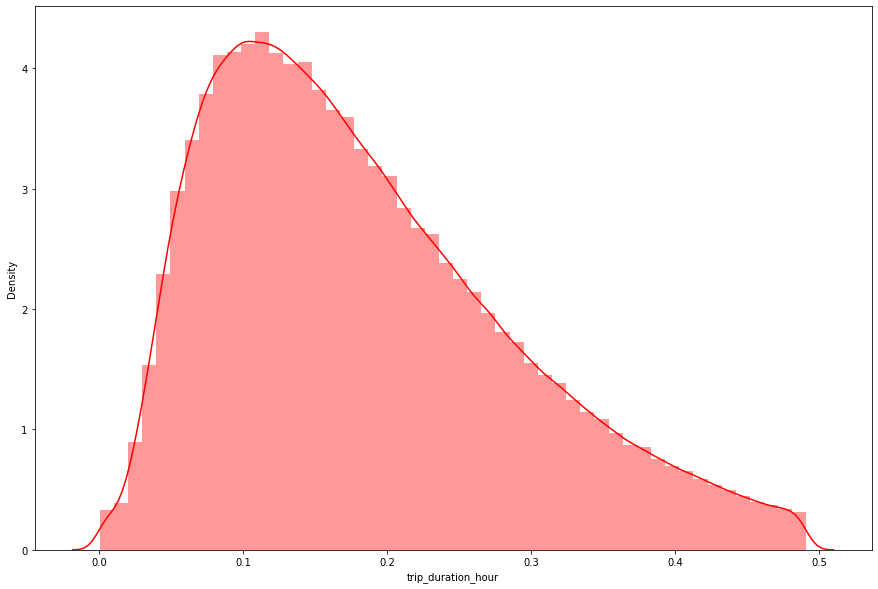

In [264]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(train_df[i],color="R")